`02_pandas3.ipynb`

# 시계열 (Time Series) 데이터

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 다양한 날짜 형식 데이터 변환 시도
date_strings = [
    '2025년8월6일',
    '15/01/2023',
    'Jan 15, 2023',
    '2023-01-15',
    '2023.01.15',
    '2025/08/05',
    '20230115',
    '15-Jan-2023',
]

for date in date_strings:
    # 예외 처리 (에러 처리)
    try:  # 일단 아래 블럭 해봐. 되면 좋고,
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except:  # 안되면 뻗지 말고, 아래 코드 실행해
        print('err', date)

In [ ]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='M')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
daily_sales.describe()

In [ ]:
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year  # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월=0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 얘만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기

daily_sales.head()

# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()
# 원하는 순서대로 Series 나 DF 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)

# 시각화
plt.figure(figsize=(12, 8))

# 일별 매출 추이
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')
plt.xticks(rotation=45)

# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균매출액')

# 분기별 매출 평균
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xticks(rotation=0)
plt.xlabel('분기')
plt.ylabel('평균매출액')

# Layout 겹치지 않게 조정
plt.tight_layout()
plt.show()

In [ ]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'

In [ ]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
d1['sales']

In [ ]:
# 날짜 범위 선택
jan_half = daily_sales['2023-01-01':'2023-01-15']
# 데이터개수, 매출 총합
len(jan_half), jan_half['sales'].sum()

In [ ]:
# 부분 문자열 활용
daily_sales.loc['2023-04']

In [ ]:
# 조건부 필터링 (weekname 컬럼이 Friday)
daily_sales[ daily_sales['weekname'] == 'Friday' ]

# 특정 월의 주말만 

# 6월 데이터만 뽑기
june = daily_sales.loc['2023-06']
# 토/일 만 True mask
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5, 6])  # 0=월

june[weekend_mask]

In [ ]:
# 마지막 10일간의 데이터
daily_sales.tail(10)

In [ ]:
# 시각화
plt.figure(figsize=(15, 10))

# 전체 날짜-매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

# 1월 데이터
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.title('2023-01 매출 추이')
plt.ylabel('매출액')

# 1Q 데이터
plt.subplot(2, 3, 3)
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()
plt.title('2023-q1 매출 추이')
plt.ylabel('매출액')

# 금요일 매출추이
plt.subplot(2, 3, 4)
friday_data = daily_sales[ daily_sales['weekday'] == 4]
friday_data['sales'].plot()
plt.title('2023 FRI 매출 추이')
plt.ylabel('매출액')

# 최근 30일
plt.subplot(2, 3, 5)
last_30_data = daily_sales.tail(30)
last_30_data['sales'].plot()
plt.title('최근30일 매출 추이')
plt.ylabel('매출액')

# 월별 박스플롯(?)
plt.subplot(2, 3, 6)

# all_month = []
# for m in range(1, 13):
#     all_month.append(daily_sales[daily_sales['month'] == m]['sales'].values)

all_month = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]

plt.boxplot(all_month)
plt.title('월별 매출 분포')
plt.xlabel('월')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

In [ ]:
%pip install -q statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터 추세, 계절성 분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 월 기준으로 리샘플링 (시간 간격 재조정)
daily_sales.resample('M')['sales'].mean()

In [ ]:
plt.figure(figsize=(15, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.8)  # 두께, 투명더
plt.grid(True, alpha=0.3)  # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균 같이 보기
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.5, label='일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('M')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='red')
plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례 표시 (label 표시)

# 시계열 분해 (Seasonal Decomposition)
# 1. Trend(추세) -> 전반적인 방향성 (증가/감소)
# 2. Seasonal(계절성)  -> 주기적으로 반복되는 패턴 (매주 금요일 매출 증가)
# 3. Residual (잔차) -> 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트, 노이즈)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)  # 덧셈모델, 주간패턴

# 7일 이동평균으로 트렌드 확인
plt.subplot(3, 2, 3) 
decomp.trend.plot()
plt.title('추세 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 7일 이동평균으로 계절성 확인
plt.subplot(3, 2, 4)
decomp.seasonal.plot()
plt.title('계절 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 히트맵(Heatmap) - 월별, 요일별
plt.subplot(3, 2, 5)
pt = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekday',
    aggfunc='mean'
)
# annot=히트맵 숫자표시, fmt=숫자 형식, cmap=색깔(Yellow -> Orange -> Red)
sns.heatmap(pt, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('월별, 요일별 평균 매출 히트맵')
plt.xlabel('요일 (0=월요일)')
plt.ylabel('월')

# 분기별 박스플롯
plt.subplot(3, 2, 6)
sns.boxplot(x='quarter', y='sales', data=daily_sales)
plt.title('분기별 매출 분포')
plt.xlabel('분기')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))


# 주간 패턴
plt.subplot(3, 2, 1)
weekday_pattern = daily_sales.groupby('weekday')['sales'].mean()
weekday_names = list('월화수목금토일')
plt.bar(range(7), weekday_pattern.values)
plt.xticks(range(7), weekday_names)
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')


# 월별 패턴
plt.subplot(3, 2, 2)
monthly_pattern = daily_sales.groupby('month')['sales'].mean()
# X축 기본 세팅 -> month는 정수라 2 간격 -> xtick을 직접 조정
monthly_pattern.plot(marker='o')
plt.xticks(range(1, 13))

'''
# Resampling 활용하는 방법
df = daily_sales.resample('M')['sales'].mean()
df.plot(marker='o')
'''

plt.title('월별 평균 매출 추이')
plt.ylabel('평균매출액')
plt.grid(True, alpha=0.3)


# 분기별 성장률 (.pct_change()) - 막대그래프
plt.subplot(3, 2, 3)
q_sales = daily_sales.groupby('quarter')['sales'].sum()
# 각 항목간 증감률
q_growth = q_sales.pct_change() * 100
q_growth.plot(kind='bar')
plt.title('분기별 매출 성장률')
plt.xlabel('분기')
plt.ylabel('성장률 %')
# 기준선(0점) 표시 가로선
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)


# 매출 분포 히스토그램 (optional)
plt.subplot(3, 2, 4)
plt.title('일별 매출 분포')
plt.hist(daily_sales['sales'], bins=50, alpha=0.7)  # bins=50 구간 개수
# 평균 세로선
sales_avg = daily_sales['sales'].mean()
plt.axvline(sales_avg, color='green', linestyle='--', label=f'평균: {sales_avg:,.0f}')  # 3자리, + 소수점x
# 중앙값 세로선
sales_med = daily_sales['sales'].median()
plt.axvline(sales_med, color='red', linestyle='--', label=f'중앙: {sales_med:,.0f}') 
plt.xlabel('매출액')
plt.ylabel('빈도')
plt.legend()  # 범례표시


# 2023 누적 매출 (.cumsum())
plt.subplot(3, 2, 5)
# 매출 누적 Series
daily_sales['cum_sales'] = daily_sales['sales'].cumsum()
daily_sales['cum_sales'].plot()
plt.title('2023년 누적 매출')
plt.ylabel('누적 매출액(만원)')
# y축 단위(만원) 바꾸기 - 유연
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/10000:,.0f}')  # 들어온 숫자를 10000으로 나누고, ','찍고 소수점 없애기
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, alpha=0.3)


# 자유롭게
plt.subplot(3, 2, 6)
plt.title('아무거나 원하는것')

plt.tight_layout()
plt.show()

In [ ]:
# 기본 시계열 연산
import matplotlib.pyplot as plt

# 시계열 데이터 연산
# 이동평균 7일
daily_sales['ma_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['ma_30'] = daily_sales['sales'].rolling(window=30).mean()


plt.figure(figsize=(15, 8))
# 이동평균 시각화
daily_sales[['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 특정기간 확대(6-8월)
daily_sales.loc['2023-06':'2023-08'][['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('6-8상세')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 변화율 계산(pct_change)
daily_sales['daily_change'] = daily_sales['sales'].pct_change()
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7)  # 주간변화율

# 일일변화율 시각화
daily_sales['daily_change'].plot()
plt.title('일일변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 주간변화율 시각화
daily_sales['weekly_change'].plot()
plt.title('주간변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 리샘플링 (원하는 주기로 나누어준다)

# 집계함수 적용 가능(사실상 그루핑)
weekly_stats = daily_sales['sales'].resample('W').agg(['sum', 'mean', 'min', 'max', 'std'])


# 주간 매출 총합
w_sales = daily_sales['sales'].resample('W').sum()
# 월간 매출 총합
m_sales = daily_sales['sales'].resample('ME').sum()  # 월 마지막날 기준 (MS)
# 분기 매출 총합
q_sales = daily_sales['sales'].resample('QE').sum()  # 분기 마지막날 기준 (QS)

# 6. 리샘플링 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
w_sales.plot(marker='o')
plt.title('주별 총 매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
m_sales.plot(kind='bar')
plt.title('월별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
q_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('분기별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
weekly_stats[['min', 'mean', 'max']].plot()
plt.title('주간 매출 통계 (최소/평균/최대)')
plt.ylabel('매출액')
plt.legend(['최소', '평균', '최대'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 실습: 주식 데이터 시계열 분석 (시뮬레이션)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 가상의 주식 데이터 생성
np.random.seed(42)

# 1년간의 일별 주식 데이터 생성
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 주식 가격 시뮬레이션 (기하 브라운 운동)
initial_price = 100000  # 초기 가격
volatility = 0.02  # 일일 변동성
drift = 0.0005  # 일일 드리프트

# 가격 변화율 생성
returns = np.random.normal(drift, volatility, n_days)
returns[0] = 0  # 첫날은 변화 없음

# 누적곱으로 가격 계산
price_multipliers = (1 + returns).cumprod()
prices = initial_price * price_multipliers

# 거래량 생성 (가격 변동성과 반비례 관계)
base_volume = 1000000
volume = base_volume + np.random.normal(0, 200000, n_days) - np.abs(returns) * 5000000
volume = np.maximum(volume, 100000)  # 최소 거래량 보장

# 데이터프레임 생성
stock_data = pd.DataFrame({
    'date': dates,        # 날짜
    'close': prices,      # 종가
    'volume': volume,     # 거래량
    'returns': returns,   # 전날 대비 가격 변화율
})

stock_data.set_index('date', inplace=True)

# 고가, 저가, 시가 생성 (종가 기준)
# 시가를 기준으로 고가/저가를 생성
stock_data['open'] = stock_data['close'].shift(1) * (1 + np.random.normal(0, 0.005, n_days))
stock_data['open'].iloc[0] = initial_price

# 고가 = 시가보다 높은 값
stock_data['high'] = stock_data['open'] * (1 + np.abs(np.random.normal(0, 0.01, n_days)))

# 저가 = 시가보다 낮은 값
stock_data['low'] = stock_data['open'] * (1 - np.abs(np.random.normal(0, 0.01, n_days)))




In [ ]:
df = stock_data[['volume', 'open', 'close', 'high', 'low', 'returns']]

df['ma_20'] = df['close'].rolling(window=20).mean()  # 20일 이동평균
df['ma_60'] = df['close'].rolling(window=60).mean()  # 60일 이동평균

# 결측치 확인 -> 있으면 처리
stock_data.isna().sum()

# 첫 5일
df.head()

In [ ]:
# 기본 주식 차트
plt.figure(figsize=(15, 12))

# 주가 추이
plt.subplot(3, 2, 1)
df['close'].plot(linewidth=1)
plt.title('주가 추이(2023)')
plt.ylabel('주가(원)')
plt.grid(True, alpha=0.3)

# 거래량
plt.subplot(3, 2, 2)
# bar,    x축    ,    y축
plt.bar(df.index, df['volume'], width=1, alpha=0.7)
plt.title('일별거래량')
plt.ylabel('거래량')

#  일일 수익률(returns)
plt.subplot(3, 2, 3)
df['returns'].plot()
plt.title('일일 수익률')
plt.ylabel('수익률')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 이동평균
plt.subplot(3, 2, 4)
ax = plt.gca()
df[['close', 'ma_20', 'ma_60']].plot(ax=ax)
plt.title('종가+이동평균')
plt.ylabel('주가(원)')
plt.legend(['종가', '20이평', '60이평'])
plt.grid(True, alpha=0.3)

# 변동성(Volatility)
plt.subplot(3, 2, 5)
df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252)  # 
df['volatility'].plot()
plt.title('변동성(연율화)')
plt.ylabel('변동성')
plt.grid(True, alpha=0.3)

# 월별 수익률
plt.subplot(3, 2, 6)
# 월말 기준 종가 변동률 (1월은 버림)
monthly_returns = df['close'].resample('ME').last().pct_change().dropna()
monthly_returns.plot(kind='bar')
plt.title('월별 수익률')
plt.ylabel('수익률')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# 기술적 지표 계산
# RSI (Relative Strength Index)
def caculate_rsi(prices: pd.Series, window=14):
    # 이전 데이터와의 수치 차이
    delta = prices.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# 볼링거 밴드
def calculate_bollinger_bands(prices: pd.Series, window=20, num_std=2):
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band


df['rsi'] = caculate_rsi(stock_data['close'])

df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(stock_data['close'])

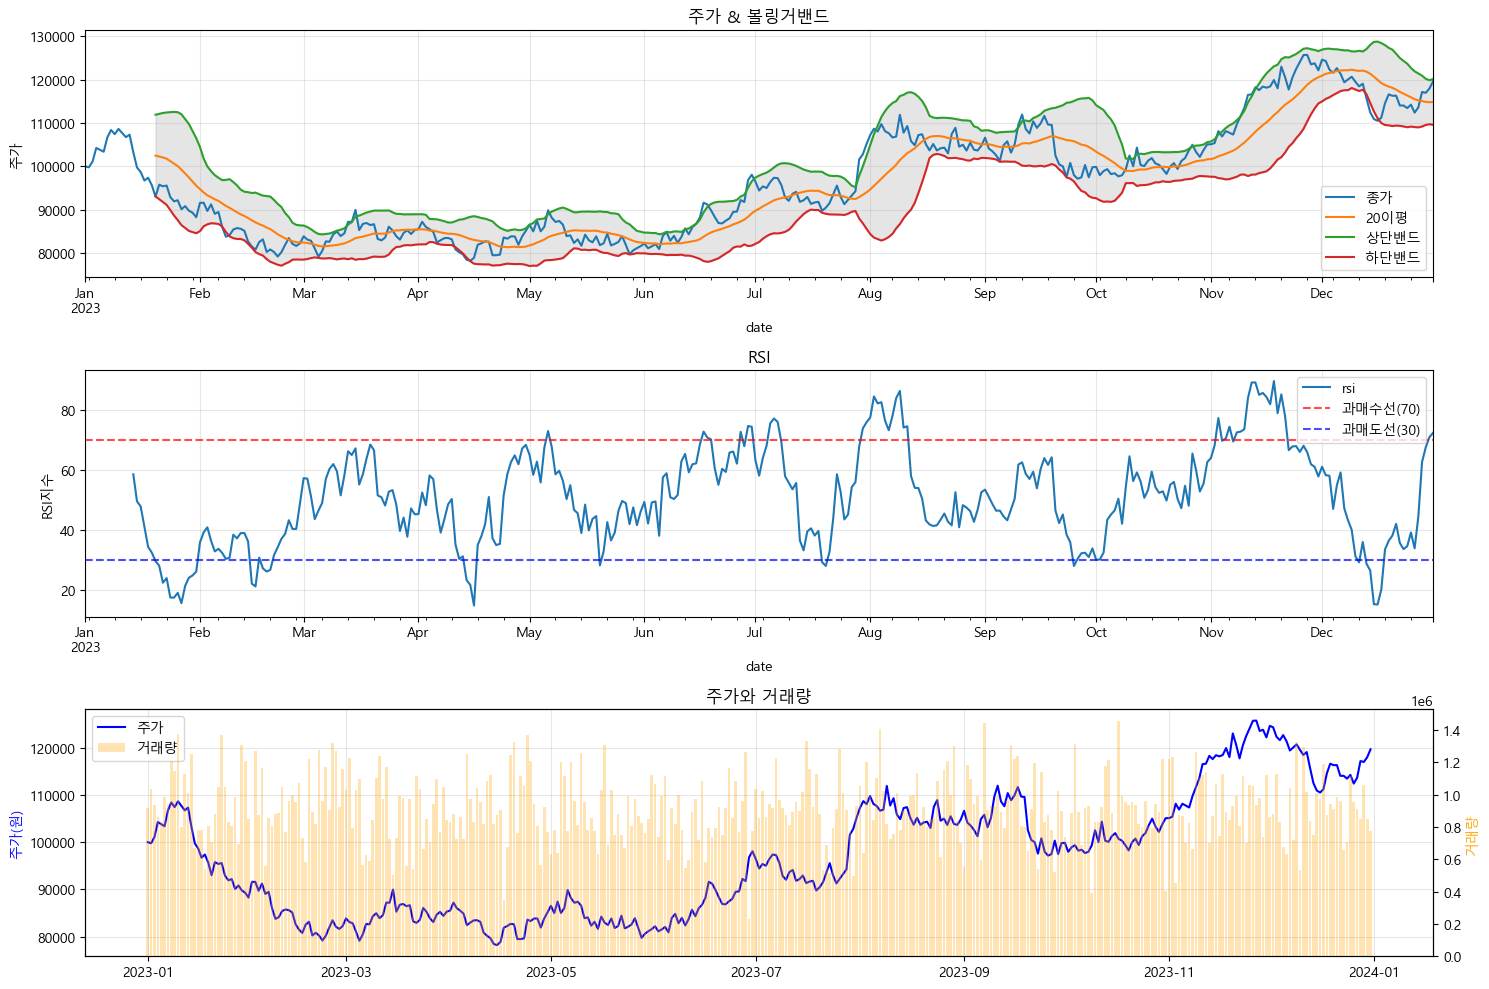

In [83]:
# 기술 분석 차트
plt.figure(figsize=(15, 10))

# 볼링거 밴드 & 주가
plt.subplot(3, 1, 1)
# df.plot => plt.figure() 를 실행함. 기존의 캔버스 내부의 subplot으로 만드는 코드
ax = plt.gca()
df[['close', 'ma_20', 'bb_upper', 'bb_lower']].plot(ax=ax)
plt.fill_between(
    df.index,
    df['bb_upper'],
    df['bb_lower'],
    alpha=0.2, color='gray'
)
plt.legend(['종가', '20이평', '상단밴드', '하단밴드'])
plt.title('주가 & 볼링거밴드')
plt.ylabel('주가')
plt.grid(True, alpha=0.3)

# RSI
plt.subplot(3, 1, 2)
df['rsi'].plot()
plt.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='과매수선(70)')
plt.axhline(y=30, color='blue', linestyle='--', alpha=0.7, label='과매도선(30)')
plt.title('RSI')
plt.ylabel('RSI지수')
plt.legend()
plt.grid(True, alpha=0.3)

# 거래량 <-> 가격 (다른 형태의 그래프를 중첩해서 시각화)
plt.subplot(3, 1, 3)
# 축을 직접 정의하고 그림
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df.index, df['close'], '-b', label='주가')  # -실선, b파랑
ax2.bar(df.index, df['volume'], alpha=0.3, color='orange', label='거래량')
ax1.set_ylabel('주가(원)', color='blue')
ax2.set_ylabel('거래량', color='orange')
ax1.set_title('주가와 거래량')
ax1.grid(True, alpha=0.3)

# 범례 결합
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='upper left')
plt.tight_layout()
plt.show()

In [105]:
# 수익률 분석

# 누적 수익률
# 마지막날 종가
cum_return = (df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100
print(f'2023 총 수익률: {cum_return:.2f}%')

# 변동성 분석 - (1년간 수익률이 얼마나 요동칠 가능성이 있는가) -> 높다: HRHR, 낮다: LRLR
annual_volatility = df['returns'].std() * np.sqrt(252) * 100
print(f'연율화 변동성: {annual_volatility:.2f}%')

# 샤프 비율 (무위험 수익률을 3% 가정) -> 높을수록 Low Risk - High Risk
risk_free_rate = 0.03  # 은행예금
# 기대수익률 - 무위험수익률
sharpe_ratio = (df['returns'].mean() * 252 - risk_free_rate)  / (df['returns'].std() * np.sqrt(252))
print(f'샤프 비율: {sharpe_ratio:.3f}')

# 최대 낙폭(Maximum Drawdown) - 최고점 대비 얼마나 떨어졌나
cum_wealth = (1 + df['returns']).cumprod()
running_max = cum_wealth.expanding().max()
drawdown = (cum_wealth - running_max) / running_max
mdd = drawdown.min() * 100
print(f'최대 낙폭: {mdd:.2f}%')


# 월별성과요약
monthly_perf = df['close'].resample('ME').last().pct_change().dropna() * 100
print(f'\n월별 평균 수익률: {monthly_perf.mean():.2f}%')
print(f'월별 수익률 변동성: {monthly_perf.std():.2f}%')
print(f'양의 수익률 월수: {(monthly_perf > 0).sum()}개월 / {len(monthly_perf)}개월')


2023 총 수익률: 19.65%
연율화 변동성: 30.09%
샤프 비율: 0.462
최대 낙폭: -27.99%

월별 평균 수익률: 3.12%
월별 수익률 변동성: 8.67%
양의 수익률 월수: 5개월 / 11개월


            close  volume  volatility  returns
close       1.000   0.047      -0.148    0.098
volume      0.047   1.000      -0.038   -0.078
volatility -0.148  -0.038       1.000   -0.061
returns     0.098  -0.078      -0.061    1.000


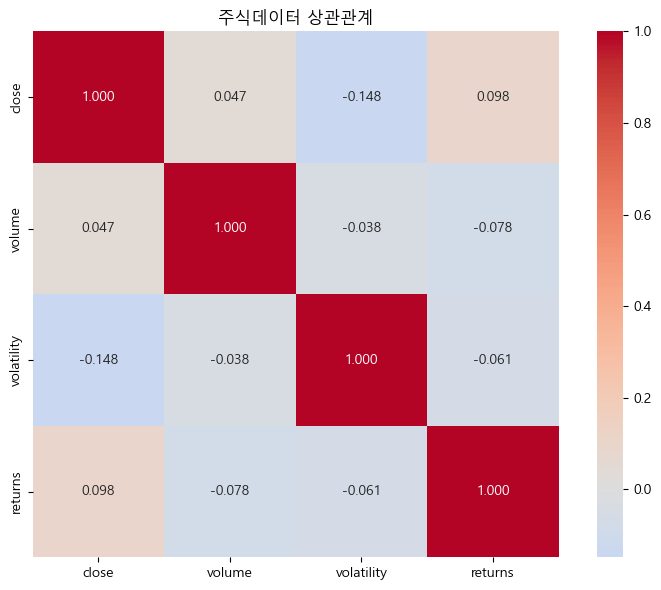

In [112]:
# 상관관계(Correlation) - 가격, 거래량, 변동성
cor_matrix = df[['close', 'volume', 'volatility', 'returns']].corr()
print(cor_matrix.round(3))

plt.figure(figsize=(8, 6))

import seaborn as sns
sns.heatmap(
    cor_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.3f'
)
plt.title('주식데이터 상관관계')
plt.tight_layout()
plt.show()